# Credit Risk Prediction using Machine Learning

## Problem Statement
Financial institutions need to assess the creditworthiness of loan applicants in order to reduce the risk of default.
The objective of this project is to build a machine learning model that predicts whether an applicant represents a
**good** or **bad** credit risk based on demographic and financial attributes.

## Business Goal
To assist banks in making data-driven lending decisions by identifying high-risk applicants before approving loans.

## Machine Learning Objective
Build, evaluate, and compare multiple classification models and deploy the best-performing model using a Streamlit web application.


## Import Required Libraries

In [49]:
# Numerical and data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


## Load the Dataset

In [50]:
# Load dataset
df = pd.read_csv("german_credit_data.csv")

In [51]:
# Preview data
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [52]:
# Dataset shape
df.shape


(1000, 11)

In [53]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [54]:
# Statistical summary
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Quality Checks

In [55]:
# Check missing values
df.isna().sum()


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [56]:
# Check duplicates
df.duplicated().sum()


np.int64(0)

## Missing Value Treatment

In [57]:
# Fill missing values instead of dropping rows
df["Saving accounts"].fillna("none", inplace=True)
df["Checking account"].fillna("none", inplace=True)


In [58]:
# Verify missing values
df.isna().sum()


Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

## Removal of Irrelevant Columns

In [59]:
# Drop index column
df.drop(columns="Unnamed: 0", inplace=True)


In [60]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,none,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,none,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,none,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


## Exploratory Data Analysis (EDA)

### Distribution of Numerical Features

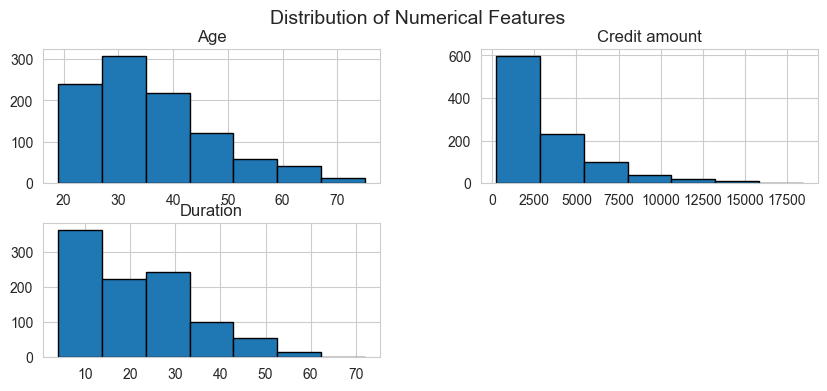

In [61]:
df[["Age", "Credit amount", "Duration"]].hist(
    bins=7,
    edgecolor="black",
    figsize=(10,4)
)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


- Age is moderately distributed with most applicants belonging to the working-age group.
- Credit amount shows high variability with many extreme values, indicating diverse loan sizes.
- Loan duration is mostly short to medium term, with fewer long-duration loans.
- Presence of outliers in credit amount and duration reflects real-world lending risk.
- These numerical patterns justify the use of robust, tree-based machine learning models.


### Outlier Analysis

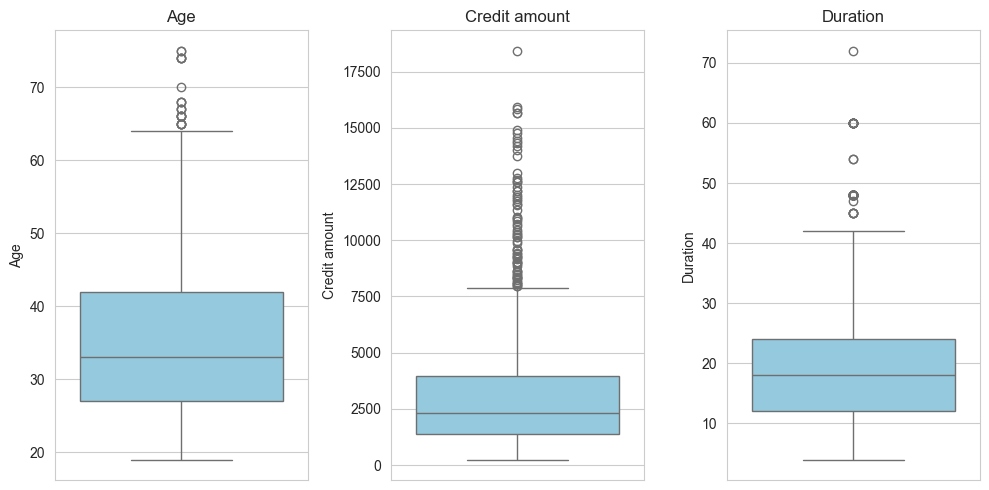

In [62]:
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


- Most applicants are young to middle-aged, with the majority between 25–45 years.
- Credit amount and loan duration show strong right skewness with several high-value outliers.
- High credit amounts and longer durations indicate increased financial risk.
- Presence of outliers suggests real-world lending variability rather than data errors.
- Tree-based models are suitable as they handle skewness and outliers effectively.


### Distribution of Categorical Features

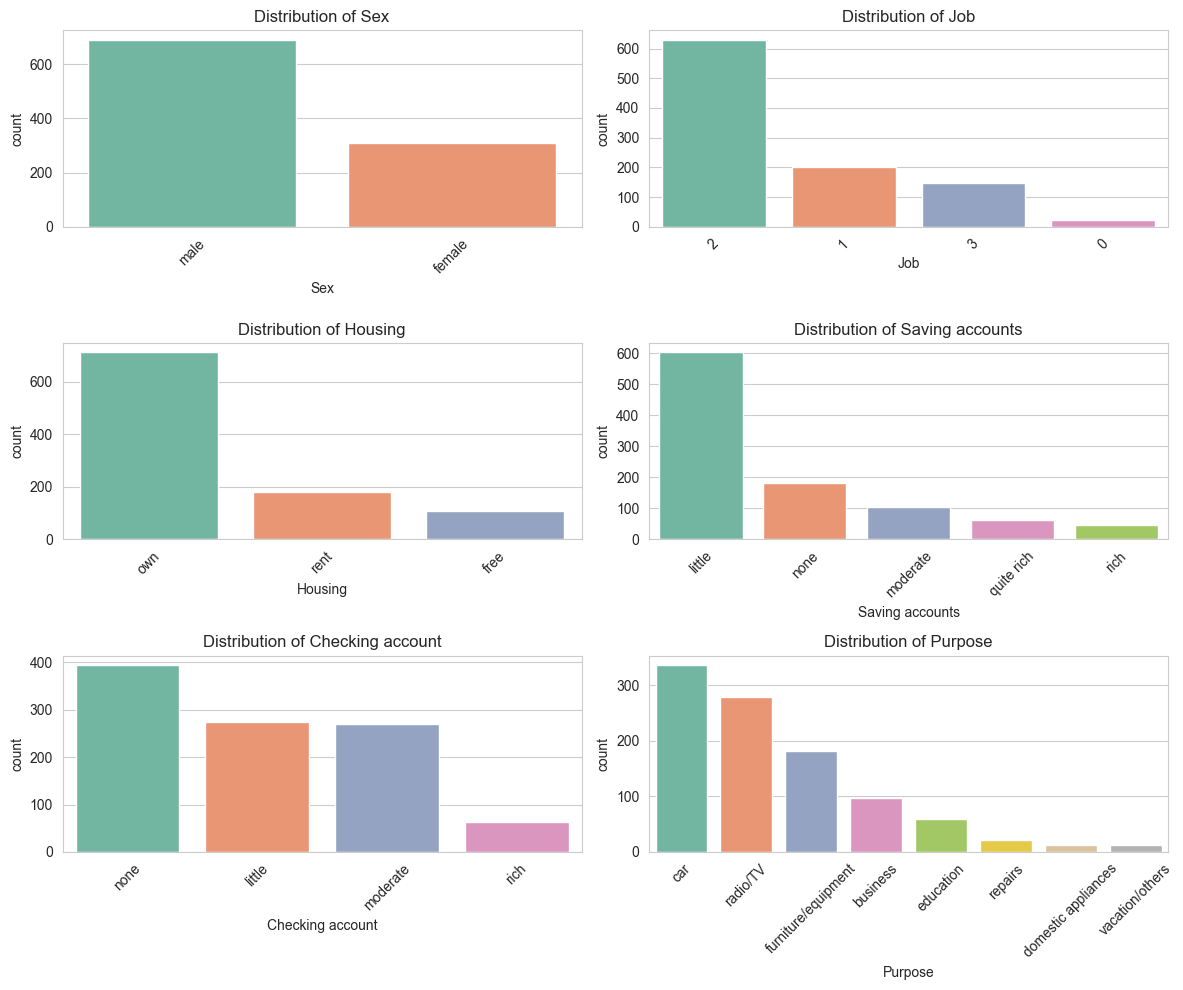

In [63]:
categorical_cols = [
    "Sex", "Job", "Housing",
    "Saving accounts", "Checking account", "Purpose"
]

plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        palette="Set2"
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Majority of loan applicants are male, indicating a gender imbalance in credit applications.
- Most applicants belong to mid-level job categories, suggesting stable employment profiles.
- Home ownership is dominant, while fewer applicants rent or live rent-free.
- Most applicants have low or no savings and checking balances, indicating limited financial buffers.
- Car and radio/TV are the most common loan purposes, reflecting consumer-driven credit demand.


### Correlation Analysis

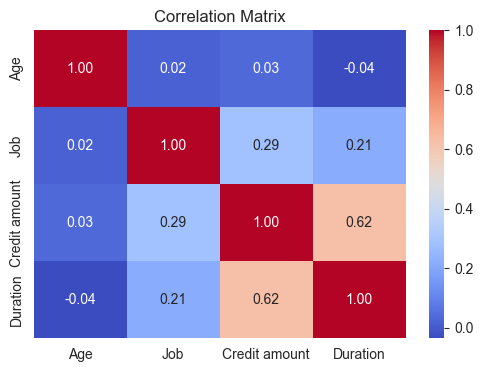

In [64]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


- Credit amount and loan duration show a strong positive correlation, indicating that higher loans usually have longer repayment periods.
- Job has a moderate positive relationship with credit amount and duration, suggesting employment level influences loan size.
- Age has very weak correlation with other numerical features.
- No strong multicollinearity is observed among most features.
- The correlation structure supports the use of tree-based models without extensive feature removal.


### Risk-Based Feature Analysis

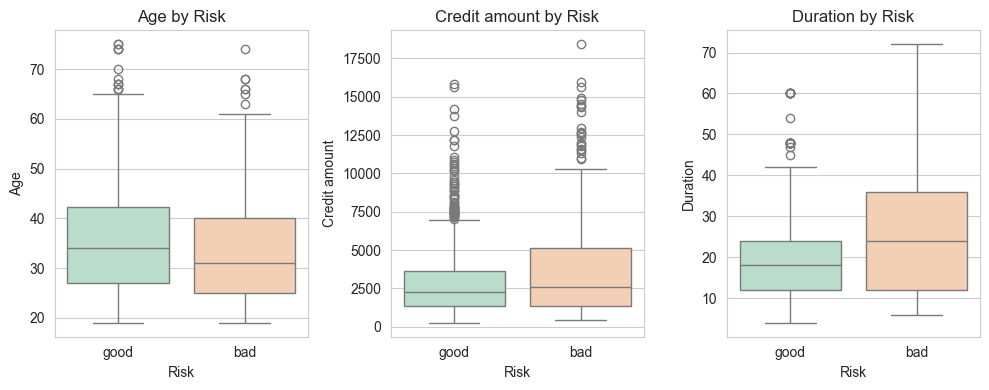

In [65]:
plt.figure(figsize=(10,4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()


- Applicants with **bad credit risk** tend to request **higher credit amounts** compared to good-risk applicants.
- **Loan duration** is generally longer for bad-risk customers, indicating extended repayment increases risk.
- **Age distribution** overlaps for both classes, suggesting age alone is not a strong risk indicator.
- Good-risk applicants show more concentrated and lower loan amounts.
- Credit amount and duration are stronger drivers of credit risk than age.


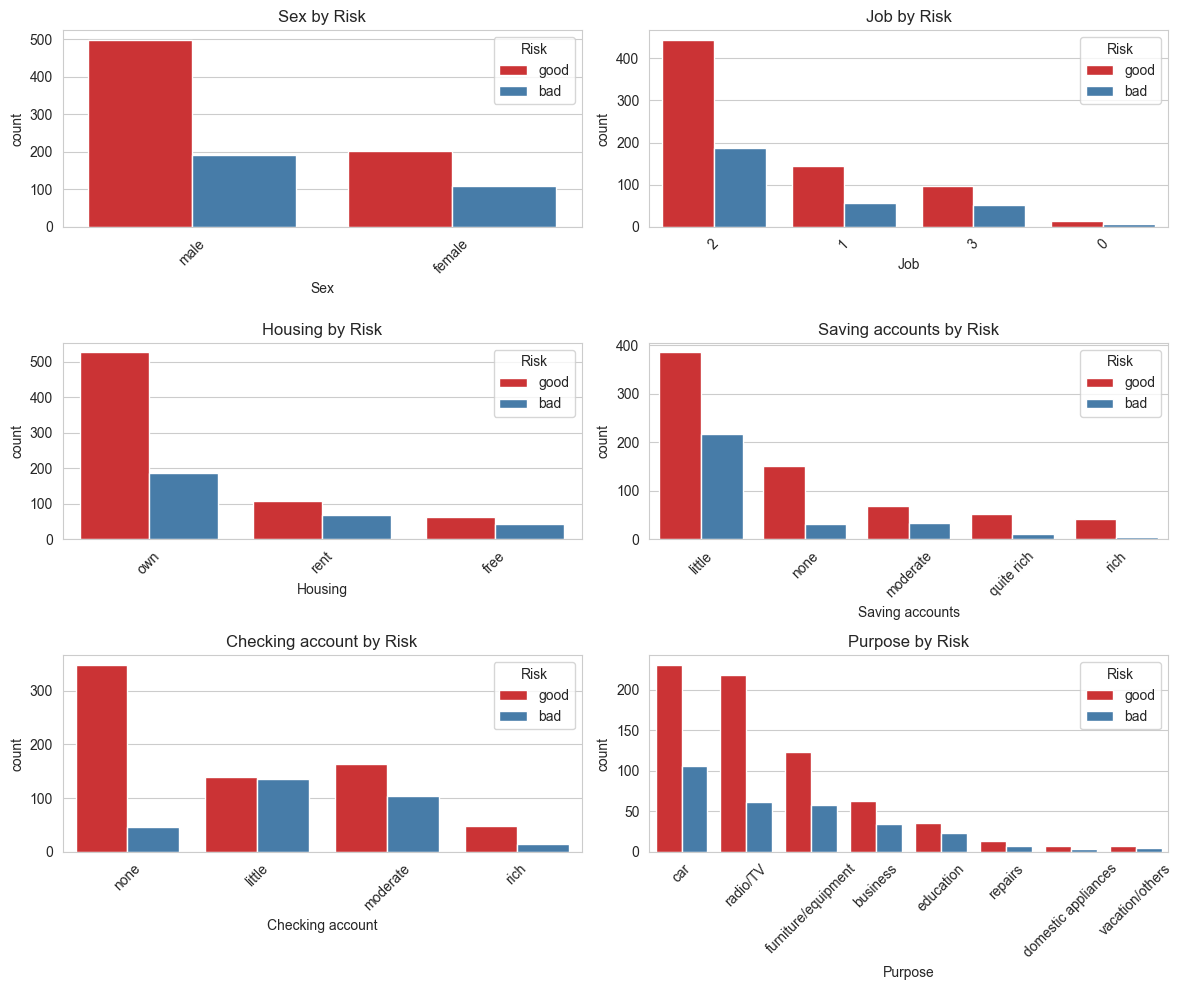

In [66]:
plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(
        data=df,
        x=col,
        hue="Risk",
        order=df[col].value_counts().index,
        palette="Set1"
    )
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Insights from Categorical Features vs Credit Risk

- Male applicants dominate the dataset, but **both genders show similar risk patterns**, indicating gender alone is not a decisive risk factor.
- Applicants with **Job category 2** form the majority and have a higher proportion of **good credit risk**, suggesting stable employment reduces risk.
- Customers with **own housing** show significantly more good credit outcomes compared to those renting or living for free.
- Individuals with **little or no savings and checking accounts** are more likely to fall under bad credit risk.
- Loan purpose such as **car and radio/TV** has higher good-risk counts, while business and education loans show relatively higher risk.


### Feature Selection

In [67]:
features = [
    "Age",
    "Sex",
    "Job",
    "Housing",
    "Saving accounts",
    "Checking account",
    "Credit amount",
    "Duration"
]

target = "Risk"

df_model = df[features + [target]].copy()
df_model.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,none,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,none,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


- Selected features combine demographic and financial attributes relevant to credit risk assessment.
- Financial variables like credit amount, duration, and account balances are key drivers of repayment behavior.
- The target variable *Risk* defines a binary classification problem (good vs bad credit).


### Encoding Categorical Variables

In [68]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Identify categorical columns
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

encoders = {}

# Apply Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le
    
    # Save encoders for Streamlit app
    joblib.dump(le, f"{col}_encoder.pkl")

df_model.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,2,0,1169,6,good
1,22,0,2,1,0,1,5951,48,bad
2,49,1,1,1,0,2,2096,12,good
3,45,1,2,0,0,0,7882,42,good
4,53,1,2,0,0,0,4870,24,bad


- Categorical features were converted into numerical form using Label Encoding to make them compatible with machine learning models.
- Separate encoders were saved for each feature to ensure consistent transformation during model deployment.
- This approach enables seamless integration between training and the Streamlit prediction app.


### Encoding the Target Variable

In [69]:
# Encode target variable (Risk)
le_target = LabelEncoder()
df_model["Risk"] = le_target.fit_transform(df_model["Risk"])

# Check class distribution
df_model["Risk"].value_counts()


Risk
1    700
0    300
Name: count, dtype: int64

- The target variable **Risk** was label-encoded to convert class labels into numerical format required by classification models.
- The distribution shows class imbalance, with more **good credit (1)** cases than **bad credit (0)**.
- This imbalance justifies the use of techniques like class weighting and ROC-AUC for fair model evaluation.


In [70]:
# Save target encoder
joblib.dump(le_target, "target_encoder.pkl")


['target_encoder.pkl']

In [71]:
X = df_model.drop("Risk", axis=1)
y = df_model["Risk"]

X.shape, y.shape


((1000, 8), (1000,))

### Train–Test Split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [73]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

### Baseline Model – Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Baseline Decision Tree model
dt = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

In [75]:
dt.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [76]:
# Evaluate on test set
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

In [77]:
dt_acc

0.7

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)


In [79]:
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [80]:
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.775

### Extra Trees

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

In [82]:
et.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=FalseWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",False
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metr

In [83]:
et_pred = et.predict(X_test)
et_acc = accuracy_score(y_test, et_pred)

et_acc

0.745

### XGBoost

In [84]:
from xgboost import XGBClassifier

# Handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

In [85]:
xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [86]:
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

xgb_acc

0.735

### Model Performance Comparison

In [87]:
pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Extra Trees", "XGBoost"],
    "Accuracy": [dt_acc, rf_acc, et_acc, xgb_acc]
})


,Model,Accuracy
0,Decision Tree,0.700
1,Random Forest,0.775
2,Extra Trees,0.745
3,XGBoost,0.735


### Hyperparameter Tuning (XGBoost)

In [88]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [89]:
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss"
)

In [90]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [91]:
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 4, ...], 'n_estimators': [200, 300], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and par

In [92]:
best_xgb = grid_search.best_estimator_
grid_search.best_params_


{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.8}

### Model Evaluation

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.74

Confusion Matrix:
 [[ 42  18]
 [ 34 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.70      0.62        60
           1       0.85      0.76      0.80       140

    accuracy                           0.74       200
   macro avg       0.70      0.73      0.71       200
weighted avg       0.76      0.74      0.75       200



### Cross-Validation Results

In [94]:
from sklearn.model_selection import cross_val_score

models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Extra Trees": et,
    "XGBoost": best_xgb
}

for name, model in models.items():
    cv_score = cross_val_score(
        model,
        X,
        y,
        cv=5,
        scoring="accuracy"
    ).mean()
    print(f"{name} CV Accuracy: {cv_score:.4f}")


Decision Tree CV Accuracy: 0.6810
Random Forest CV Accuracy: 0.7470
Extra Trees CV Accuracy: 0.7420
XGBoost CV Accuracy: 0.7210


In [95]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    auc_score = cross_val_score(
        model,
        X,
        y,
        cv=5,
        scoring="roc_auc"
    ).mean()
    print(f"{name} CV ROC-AUC: {auc_score:.4f}")


Decision Tree CV ROC-AUC: 0.6274
Random Forest CV ROC-AUC: 0.7499
Extra Trees CV ROC-AUC: 0.7439
XGBoost CV ROC-AUC: 0.7602


## Final Model Selection

Although Random Forest achieved marginally higher accuracy, accuracy alone is not sufficient
for credit risk modeling due to class imbalance and business impact of misclassification.

ROC-AUC was used as the primary evaluation metric because it measures a model’s ability
to correctly rank high-risk applicants.

XGBoost achieved the highest ROC-AUC score (0.7602), demonstrating superior risk
discrimination and probability estimation.

Therefore, XGBoost was selected as the final production model.


In [96]:
# Save final trained XGBoost model
import joblib
joblib.dump(best_xgb, "XGB_Credit_model.pkl")
print("Final model saved successfully.")


Final model saved successfully.
